In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import os
import seaborn as sns
import pandas as pd
import numpy as np

os.chdir('../scripts')
import nomad_request

In [12]:
nomad_eda = nomad_request.retrieve_nomad(lat_range = (7, 73),
                                         lon_range = (9, 222),
                                         out_type='pandas')

Xarray's conversion to pandas creates a MultiIndex based on the .25 degree steps - first is all 0-360 by .25 for latitude degree -90, followed by 0-360 by .25 for -89.75, and so on and so forth. In xarray's native format this is a multidimensional data structure - could be more useful down the line to leave it in that form depending on final product. 

In [13]:
nomad_eda.head()

time   step  potentialVorticity  \
latitude longitude                                                  
7.0      9.00      2022-02-28 06:00:00 0 days                   2   
         9.25      2022-02-28 06:00:00 0 days                   2   
         9.50      2022-02-28 06:00:00 0 days                   2   
         9.75      2022-02-28 06:00:00 0 days                   2   
         10.00     2022-02-28 06:00:00 0 days                   2   

                            valid_time         u     v           t  \
latitude longitude                                                   
7.0      9.00      2022-02-28 06:00:00 -1.831073   6.6  197.688919   
         9.25      2022-02-28 06:00:00 -6.131073  14.3  199.588913   
         9.50      2022-02-28 06:00:00 -2.831073  -8.3  194.988922   
         9.75      2022-02-28 06:00:00 -3.731073  -0.4  194.388916   
         10.00     2022-02-28 06:00:00 -2.031073  -4.4  194.188919   

                              gh          pres      vwsh  
latitude longitude                                        
7.0      9.00       17054.992188   9299.917969 -0.001734  
         9.25       15449.391602  12333.517578 -0.000734  
         9.50       16432.591797  10232.717773  0.005266  
         9.75       17192.591797   8954.317383  0.004266  
         10.00      16846.992188   9533.517578 -0.006734

In [14]:
# 360 degrees x 4 subdivisions of 0.25 per degree - here is next latitude gridline
nomad_eda.iloc[(360 * 4):,].head()

time   step  potentialVorticity  \
latitude longitude                                                  
7.25     155.75    2022-02-28 06:00:00 0 days                   2   
         156.00    2022-02-28 06:00:00 0 days                   2   
         156.25    2022-02-28 06:00:00 0 days                   2   
         156.50    2022-02-28 06:00:00 0 days                   2   
         156.75    2022-02-28 06:00:00 0 days                   2   

                            valid_time          u    v           t  \
latitude longitude                                                   
7.25     155.75    2022-02-28 06:00:00 -17.331074 -3.9  187.388916   
         156.00    2022-02-28 06:00:00 -18.931072 -3.2  188.588913   
         156.25    2022-02-28 06:00:00 -16.631073 -0.8  189.088913   
         156.50    2022-02-28 06:00:00 -16.531073 -1.5  187.388916   
         156.75    2022-02-28 06:00:00 -14.731073 -3.5  190.988922   

                              gh          pres      vwsh  
latitude longitude                                        
7.25     155.75     16844.992188   9571.917969  0.000266  
         156.00     16589.791016  10031.117188 -0.004734  
         156.25     16936.191406   9450.317383 -0.006734  
         156.50     17338.591797   8751.117188 -0.002734  
         156.75     16182.992188  10840.717773  0.004266

Some basic checks first:

In [15]:
min(nomad_eda.time), max(nomad_eda.time)

(Timestamp('2022-02-28 06:00:00'), Timestamp('2022-02-28 06:00:00'))

In [16]:
nomad_eda.dtypes

time                   datetime64[ns]
step                  timedelta64[ns]
potentialVorticity              int64
valid_time             datetime64[ns]
u                             float32
v                             float32
t                             float32
gh                            float32
pres                          float32
vwsh                          float32
dtype: object

In [17]:
nomad_eda.describe()

,step,potentialVorticity,u,v,t,gh,pres,vwsh
count,226045,226045.0,226037.000000,226037.000000,226037.000000,226037.000000,226037.000000,226037.000000
mean,0 days 00:00:00,2.0,15.802462,-0.679785,208.705338,11899.823242,21746.794922,-0.002368
std,0 days 00:00:00,0.0,21.841316,10.880427,11.874263,3630.095459,9963.534180,0.007689
min,0 days 00:00:00,2.0,-42.631073,-48.500000,182.888916,3998.991699,5779.917480,-0.060734
25%,0 days 00:00:00,2.0,-1.031073,-6.200000,197.488922,8940.191406,11162.317383,-0.006734
50%,0 days 00:00:00,2.0,12.168927,0.300000,209.888916,10645.791992,23131.917969,-0.001734
75%,0 days 00:00:00,2.0,30.868927,5.300000,217.688919,15923.791992,29047.117188,0.002266
max,0 days 00:00:00,2.0,93.668930,57.599998,249.188919,19738.191406,59379.917969,0.061266


In [18]:
pd.isna(nomad_eda).sum(axis='rows') / nomad_eda.shape[0]

time                  0.000000
step                  0.000000
potentialVorticity    0.000000
valid_time            0.000000
u                     0.000035
v                     0.000035
t                     0.000035
gh                    0.000035
pres                  0.000035
vwsh                  0.000035
dtype: float64

Based on what I can currently glean from the only documentation I can find on these data (https://www.nco.ncep.noaa.gov/pmb/products/gfs/gfs.t00z.pgrb2.0p25.anl.shtml, which was found on the very confusing directory on https://www.nco.ncep.noaa.gov/pmb/products/gfs/), these variables are as follows:

- `u` - U-Component of Wind [m/s]
- `v` - V-Component of Wind [m/s]
- `t` - Temperature [K]
- `gh` - Geopotential Height [gpm]
- `pres` - Pressure [Pa]
- `vwsh` - 	Vertical Speed Shear [1/s]

In [19]:
nomad_eda.shape 

(226045, 10)

In [20]:
# to avoid bad math/fence post problem - how many rows should we have?
lats = len(np.arange(-90, 90.25, .25))
lons = len(np.arange(0, 360.25, .25))
lats * lons

1038961

Next steps - establish which of these variables are useful and more generally, determine _where_ the definitive source is for documentation here.

In [21]:
sns.set(rc={'figure.figsize':(10,6)})

Since wind speed is generally lower on land that over sea, it seems _reasonable_ that `sp` is wind speed - but something this basic should be easy to find docs for, so I must be looking in the wrong place. 

[Text(0.5, 1.0, 'u')]

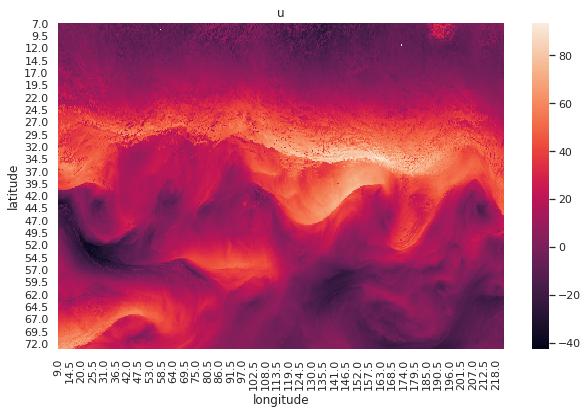

In [22]:
gfs_plot = sns.heatmap(nomad_eda.u.unstack('longitude'))
gfs_plot.set(title='u')

The other variables just for good measure:

[Text(0.5, 1.0, 'v')]

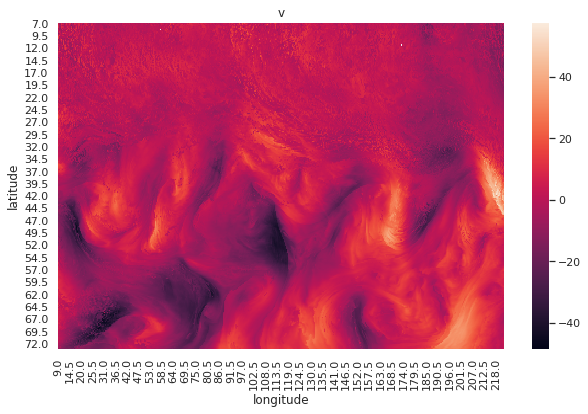

In [23]:
gfs_plot = sns.heatmap(nomad_eda.v.unstack('longitude'))
gfs_plot.set(title='v')

[Text(0.5, 1.0, 't')]

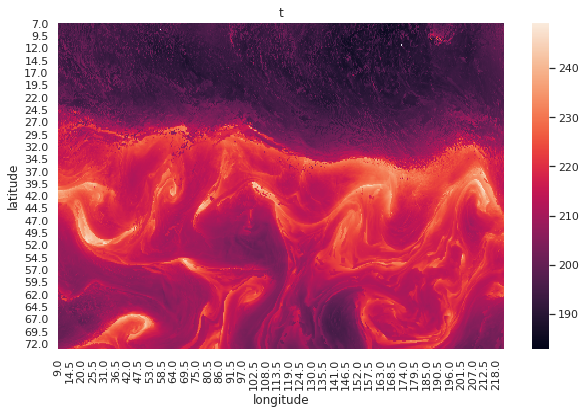

In [24]:
gfs_plot = sns.heatmap(nomad_eda.t.unstack('longitude'))
gfs_plot.set(title='t')

[Text(0.5, 1.0, 'gh')]

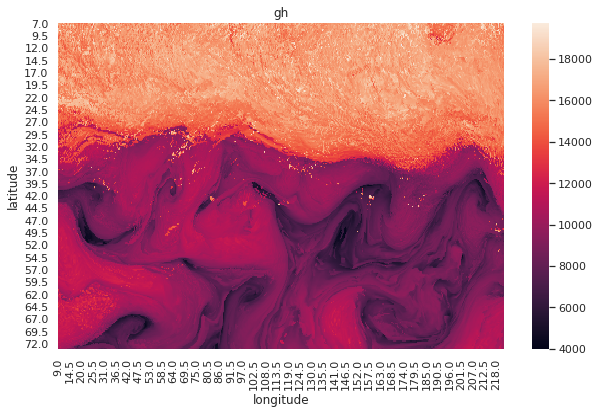

In [25]:
gfs_plot = sns.heatmap(nomad_eda.gh.unstack('longitude'))
gfs_plot.set(title='gh')

[Text(0.5, 1.0, 'vwsh')]

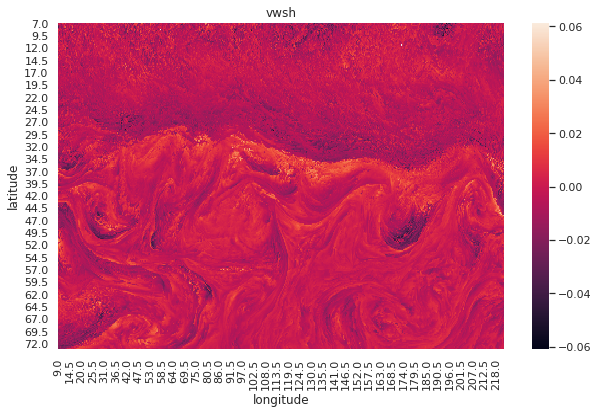

In [26]:
gfs_plot = sns.heatmap(nomad_eda.vwsh.unstack('longitude'))
gfs_plot.set(title='vwsh')